#       __SDG 7.1.1 : Access to Electricity : Trend Analysis (2000-2021)__
- Anvesh Khode:         https://www.linkedin.com/in/anvesh-k-5bba47259/ 
- Aditya Joshi:         https://www.linkedin.com/in/aditya-joshi-31034b292/

- Dataset              https://trackingsdg7.esmap.org/downloads 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
file_path =  './sdgDataset1.xlsx'

data = pd.ExcelFile(file_path)
data.sheet_names


['Note on Sources',
 'UN reporting',
 'UN reporting source note',
 'ea_total_rate_deficit',
 'ea_urban_rate_deficit',
 'ea_rural_rate_deficit',
 'ea_total_rate_deficit-REFERENCE']

In [3]:
# Mass Encoder Function
def encode_columns(sheets, columns):
    label_encoders = {}
    for col in columns:
        le = LabelEncoder()
        sheets[col] = le.fit_transform(sheets[col])
        label_encoders[col] = le

    return label_encoders

In [4]:
# Printing unique entries for all columns in a sheet
def unique_entries(sheet):
    print("Number of unique entries in: \n")
    for field in sheet:
        unique_values = sheet[field].unique()
        if pd.api.types.is_string_dtype(sheet[field]):
            print(f"Unique entries in {field}: {unique_values}")
        unique_count = len(unique_values)
        print(f"{field} : {unique_count}\n")

---Skip

In [5]:
# UN Reporting Sheet Analysis
un_reporting_data = data.parse('UN reporting')


In [6]:
# Feature Selection
cleaned_data = un_reporting_data.drop(columns=[ 'Reporting Type', 'SeriesCode', 'SeriesID', 'Indicator', 'Units', 'GeoAreaName/Reference Area Name', 'GeoAreaName/Reference Area Name', 'Ref_Area_Type', 'SeriesName', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'FootNote', 'ISOalpha3', 'Source'])
cleaned_data.columns = cleaned_data.columns.str.strip()
cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

cleaned_data.head()

C:\Users\anves\AppData\Local\Temp\ipykernel_19116\3275182752.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [7]:
cleaned_data.isnull().sum()

GeoAreaCode/Reference Area Code      0
TimePeriod                           0
Value                                0
Nature                             562
Location                             0
Type                                 0
dtype: int64

In [9]:
# Filling Missing Values

# Nature column, replace NA values with its own label
cleaned_data['Nature'] = cleaned_data['Nature'].fillna('NA')
cleaned_data['Nature'] = cleaned_data['Nature'].replace('NA ', 'NA')

# Replace 'NaN' values with median
cleaned_data['Value'].replace('NaN', cleaned_data['Value'].median())

cleaned_data.head()

,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [11]:
print(cleaned_data.isnull().sum())

index = 0
for row in cleaned_data['Nature']:
    if row == 'NA':
        index = index+1

print(f"Nature elements which are 'NA': ", index)
print("Dropping rows...")
cleaned_data = cleaned_data[cleaned_data['Nature'] != 'NA']
print(f"Nature elements which are 'NA': ", sum(cleaned_data['Nature'] == 'NA'))


GeoAreaCode/Reference Area Code    0
TimePeriod                         0
Value                              0
Nature                             0
Location                           0
Type                               0
dtype: int64
Nature elements which are 'NA':  0
Dropping rows...
Nature elements which are 'NA':  0


In [12]:
unique_entries(cleaned_data)

Number of unique entries in: 

GeoAreaCode/Reference Area Code : 320

TimePeriod : 23

Value : 1163

Unique entries in Nature: ['E' 'M' 'C' 'N']
Nature : 4

Unique entries in Location: ['ALLAREA' 'URBAN' 'RURAL']
Location : 3

Unique entries in Type: ['Region' 'Country']
Type : 2



In [13]:
# Label Encode the Data with the mass encoder

columns_to_encode = ['Location', 'Type', 'Nature', 'TimePeriod']
label_encoders = encode_columns(cleaned_data, columns_to_encode)

cleaned_data.head()



,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,0,37.7,1,0,1
1,98106,1,38,1,0,1
2,98106,2,39,1,0,1
3,98106,3,40.9,1,0,1
4,98106,4,40.7,1,0,1


# EDA

C:\Users\anves\AppData\Local\Temp\ipykernel_19116\2231117401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


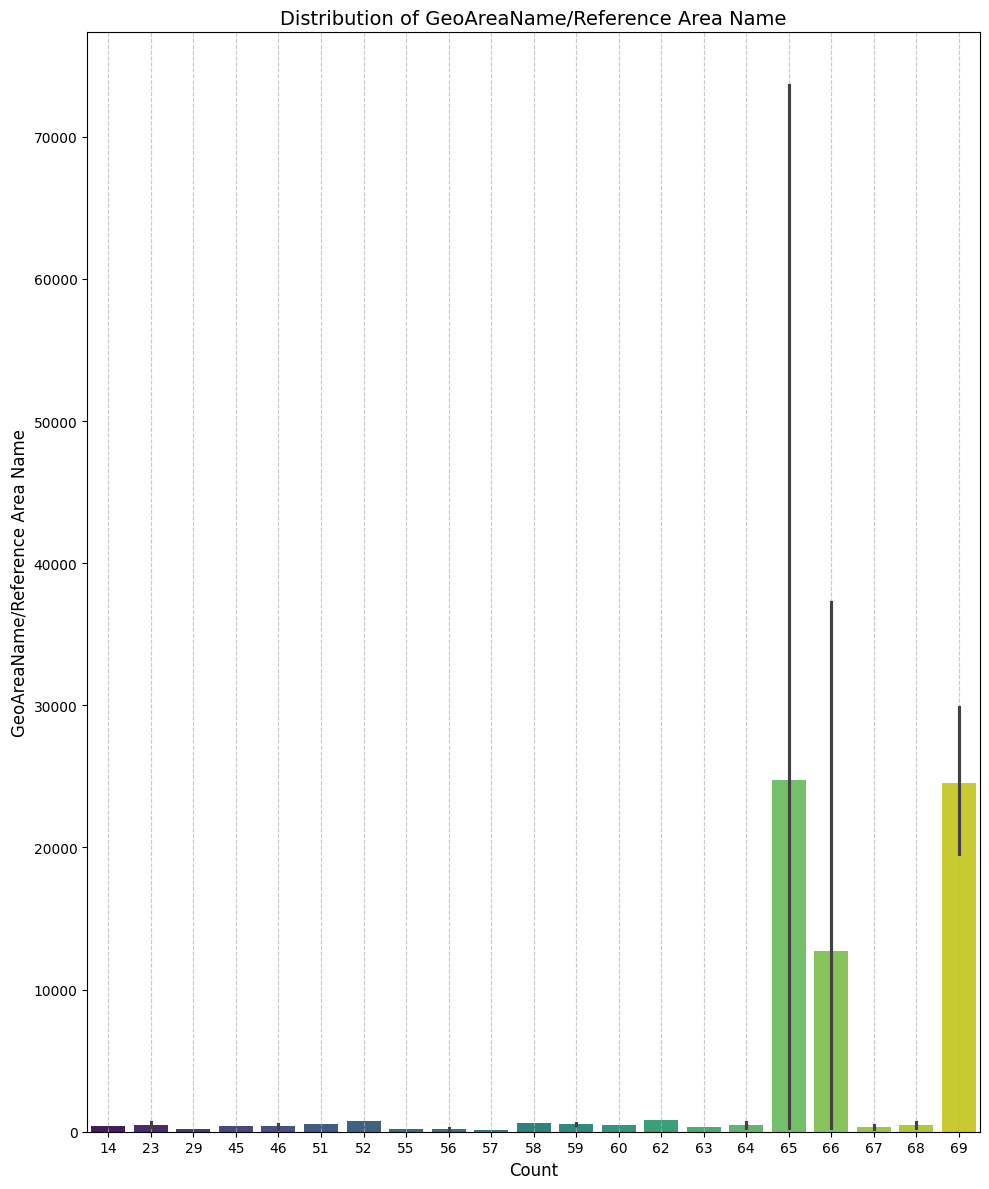

In [21]:
# Count the occurrences of each category
counts = cleaned_data['GeoAreaCode/Reference Area Code'].value_counts()

# Sort by counts for better visualization
counts = counts.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(
    x=counts.values,
    y=counts.index,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('GeoAreaName/Reference Area Name', fontsize=12)
plt.title('Distribution of GeoAreaName/Reference Area Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


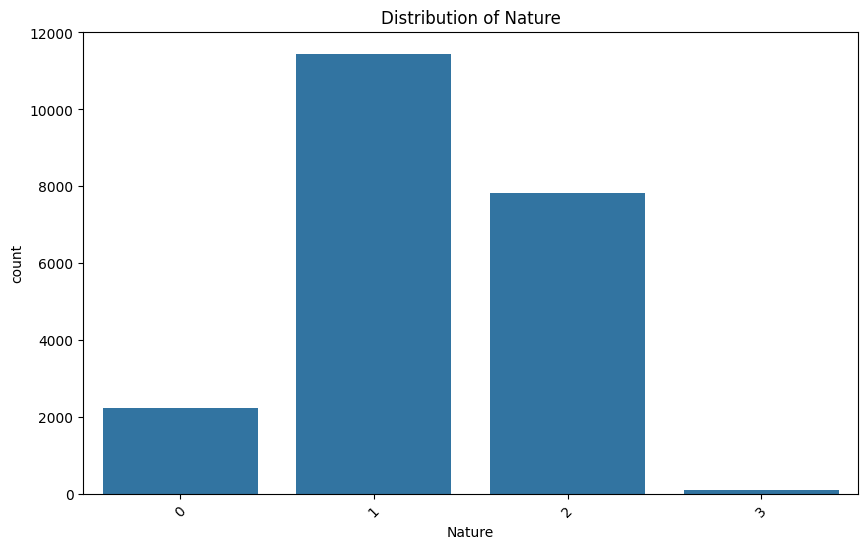

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Nature')
plt.title('Distribution of Nature')
plt.xticks(rotation=45)
plt.show()


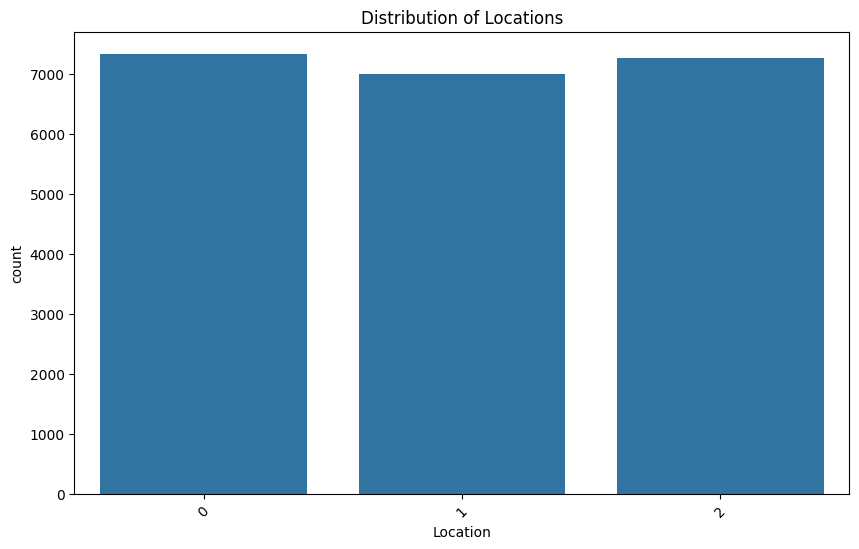

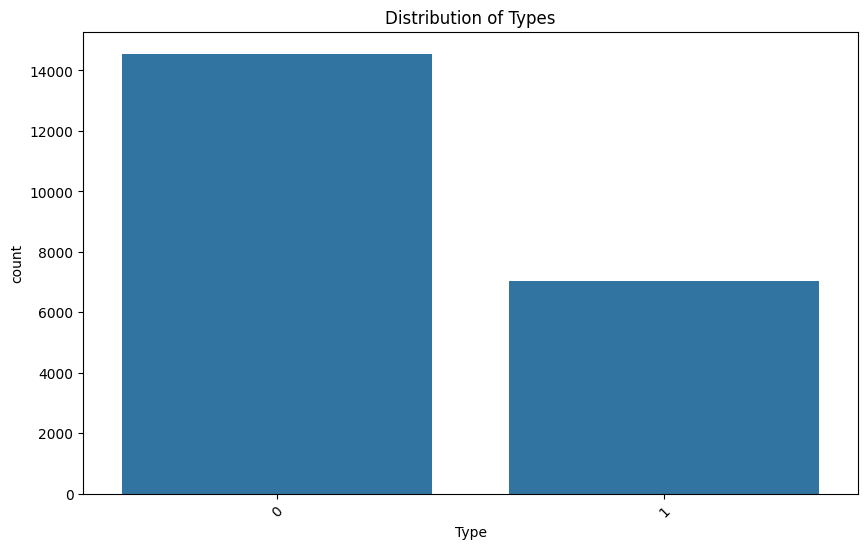

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Location')
plt.title('Distribution of Locations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Type')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()


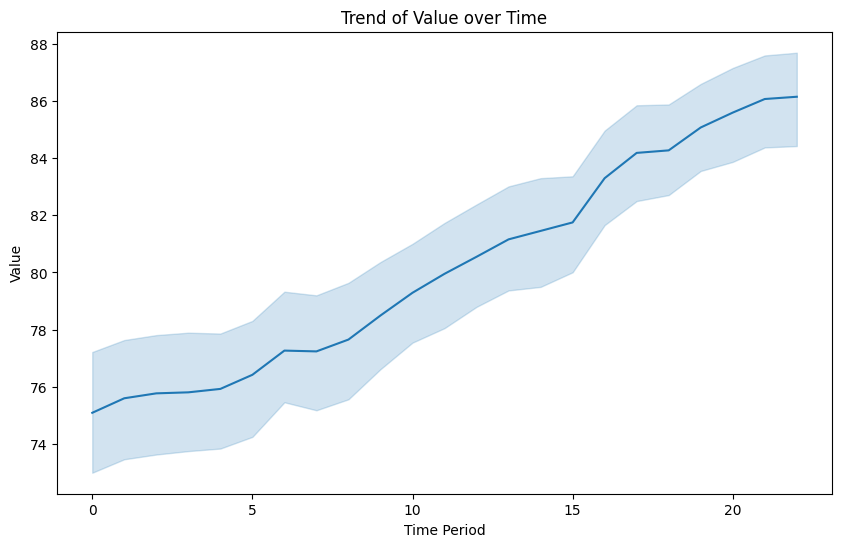

In [24]:
# Assuming TimePeriod is numeric or can be converted to a time format
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='TimePeriod', y='Value')
plt.title('Trend of Value over Time')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.show()

# Random Forest Regressor
### Training the model

In [25]:
# Load the dataset
data1 = cleaned_data

# Features and target
X = data1[['GeoAreaCode/Reference Area Code', 'TimePeriod', 'Nature', 'Location', 'Type']]
y = data1['Value']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.5269258744498515
Root Mean Squared Error (RMSE): 6.223700504137234


### Predicting a value

In [42]:
# Predict for new data
new_data = pd.DataFrame({
    'GeoAreaCode/Reference Area Code': [98106],
    'TimePeriod': [30],
    'Nature': [1],
    'Location': [0],
    'Type': [1]
})
new_prediction = model.predict(new_data)
print(f"Predicted Modern Energy Resource Availibility percentage for year { 2000 + new_data['TimePeriod'].iloc[0]} : {new_prediction[0]:.2f}%")

Predicted Modern Energy Resource Availibility percentage for year 2030 : 58.05%


# 2nd Dataset - Trend Analysis of countries

In [43]:
ea_total_rate_deficit = data.parse('ea_total_rate_deficit', usecols=list(range(49)))
ea_total_rate_deficit

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afghanistan,Central Asia and Southern Asia,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,6.045929e+06
1,Albania,Northern America and Europe,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Algeria,Western Asia and Northern Africa,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,7.095159e+04
3,American Samoa,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Andorra,Northern America and Europe,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Western Asia and Northern Africa,NaN,88.073284,88.650167,88.580416,89.260560,89.133464,89.697461,91.420104,89.862460,...,3.231626e+07,3.501580e+07,3.479727e+07,3.347274e+07,2.949568e+07,3.627430e+07,3.154637e+07,3.081990e+07,3.024835e+07,2.988148e+07
225,Sub-Saharan Africa,NaN,25.798302,26.012223,27.219305,29.540140,29.311852,29.274155,31.168640,32.533935,...,5.728383e+08,5.860097e+08,5.947437e+08,5.639254e+08,5.804772e+08,5.677724e+08,5.749707e+08,5.756052e+08,5.666395e+08,5.712388e+08
226,Oceania,NaN,81.595715,81.466043,81.369678,81.243673,81.109301,81.017766,80.398437,80.840325,...,7.429488e+06,7.494825e+06,7.602015e+06,8.186205e+06,7.800237e+06,8.208796e+06,7.681359e+06,8.099672e+06,8.236045e+06,8.547971e+06
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Dropping null values
ea_total_rate_deficit.dropna(inplace=True)
ea_total_rate_deficit.isna().sum()


Country/Regional and global averages    0
Region                                  0
2000                                    0
2001                                    0
2002                                    0
2003                                    0
2004                                    0
2005                                    0
2006                                    0
2007                                    0
2008                                    0
2009                                    0
2010                                    0
2011                                    0
2012                                    0
2013                                    0
2014                                    0
2015                                    0
2016                                    0
2017                                    0
2018                                    0
2019                                    0
2020                                    0
2021                              

In [45]:
unique_entries(ea_total_rate_deficit)

Number of unique entries in: 

Unique entries in Country/Regional and global averages: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'China' 'China, Hong Kong Special Administrative Region'
 'China, Macao Special Administrative Region' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curaçao'
 'Cyprus' 'Czechia' 'Democratic Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Erit

In [46]:
# Label Encoding the columns

columns_to_encode_2 = ['2022 data sources', 'Region', 'Country/Regional and global averages']

label_encoders_2 = encode_columns(ea_total_rate_deficit, columns_to_encode_2)
ea_total_rate_deficit.head()

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,0,0,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,6.045929e+06
1,1,3,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2,6,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,7.095159e+04
4,3,3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,4,5,24.238865,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,...,1.610703e+07,1.844727e+07,1.631408e+07,1.697243e+07,1.724724e+07,1.710975e+07,1.758939e+07,1.773199e+07,1.786472e+07,1.833932e+07


In [47]:
# Splitting the dataset into countries with percentage electricity access and count of people without electricity access

access_percentage = ea_total_rate_deficit.iloc[:, 3:24]
access_percentage.columns = access_percentage.columns.astype(str)
access_percentage = access_percentage.add_suffix('_percentage')

without_access = ea_total_rate_deficit.iloc[:, 27:48]
without_access.columns = without_access.columns.astype(str)
without_access.columns = without_access.columns.str.replace('.1', '', regex=False)
without_access = without_access.add_suffix('_without')

access_percentage['Country'] = ea_total_rate_deficit['Country/Regional and global averages']
access_percentage['Region'] = ea_total_rate_deficit['Region']

without_access['Country'] = ea_total_rate_deficit['Country/Regional and global averages']
without_access['Region'] = ea_total_rate_deficit['Region']

print("Access Percentage Columns:")
print(access_percentage.columns)

print("\nWithout Access Columns:")
print(without_access.columns)


Access Percentage Columns:
Index(['2001_percentage', '2002_percentage', '2003_percentage',
       '2004_percentage', '2005_percentage', '2006_percentage',
       '2007_percentage', '2008_percentage', '2009_percentage',
       '2010_percentage', '2011_percentage', '2012_percentage',
       '2013_percentage', '2014_percentage', '2015_percentage',
       '2016_percentage', '2017_percentage', '2018_percentage',
       '2019_percentage', '2020_percentage', '2021_percentage', 'Country',
       'Region'],
      dtype='object')

Without Access Columns:
Index(['2001_without', '2002_without', '2003_without', '2004_without',
       '2005_without', '2006_without', '2007_without', '2008_without',
       '2009_without', '2010_without', '2011_without', '2012_without',
       '2013_without', '2014_without', '2015_without', '2016_without',
       '2017_without', '2018_without', '2019_without', '2020_without',
       '2021_without', 'Country', 'Region'],
      dtype='object')


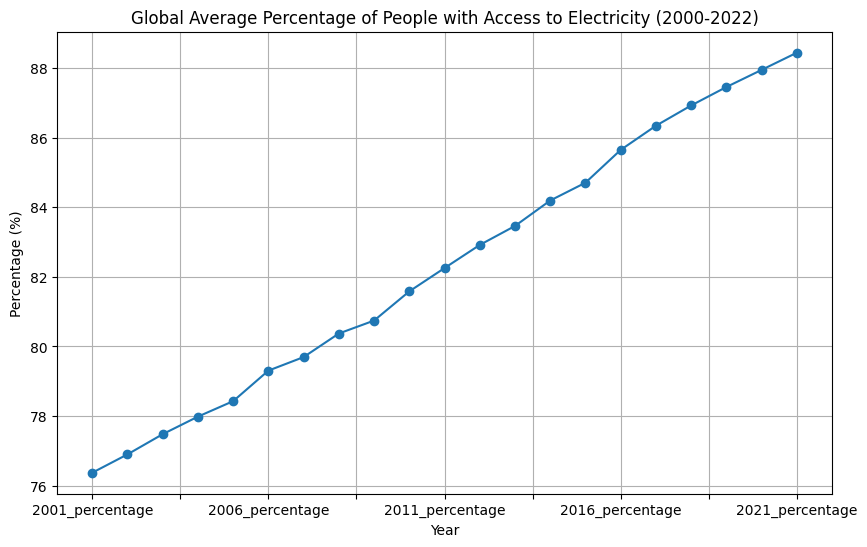

In [48]:
# Calculate global average for each year
global_avg = access_percentage.drop(columns=['Country', 'Region']).mean()

# Plot
plt.figure(figsize=(10, 6))
global_avg.plot(kind='line', marker='o')
plt.title('Global Average Percentage of People with Access to Electricity (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid()
plt.show()


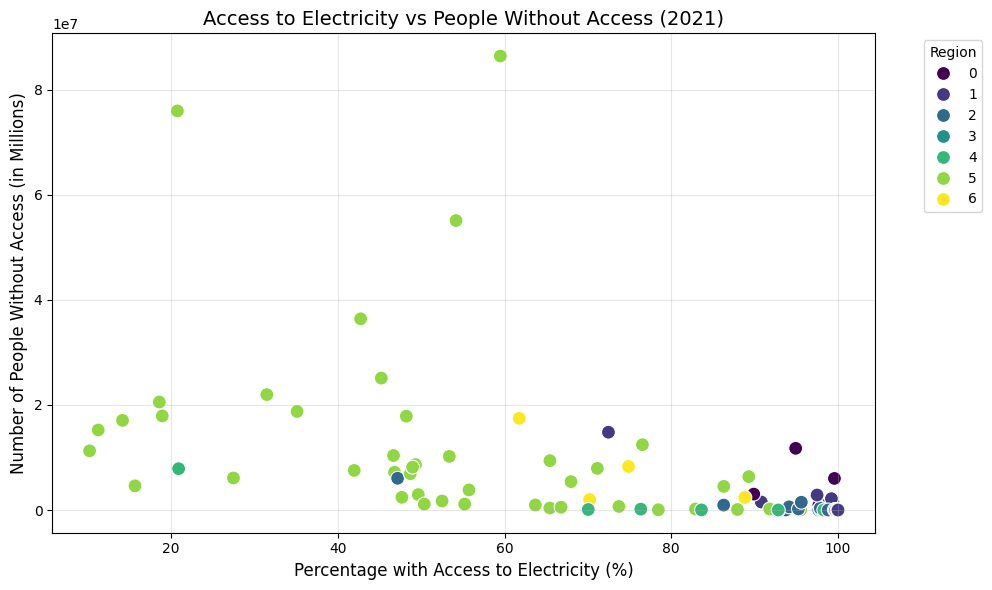

In [49]:

# Example year for comparison (ensure this column exists)
year = '2021'

# Merge the two DataFrames based on the 'Country' column
merged_df = access_percentage.merge(without_access, on=['Country', 'Region'], suffixes=('_percentage', '_without'))

# Ensure we have correct columns for the selected year
merged_df = merged_df.dropna(subset=[f'{year}_percentage', f'{year}_without'])

# Scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_df[f'{year}_percentage'],
    y=merged_df[f'{year}_without'],
    hue=merged_df['Region'],  # Color by region
    palette='viridis',
    s=100
)

# Titles and labels
plt.title(f"Access to Electricity vs People Without Access ({year})", fontsize=14)
plt.xlabel("Percentage with Access to Electricity (%)", fontsize=12)
plt.ylabel("Number of People Without Access (in Millions)", fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


In [50]:
ea_total_rate_deficit.columns


Index(['Country/Regional and global averages',
                                     'Region',
                                         2000,
                                         2001,
                                         2002,
                                         2003,
                                         2004,
                                         2005,
                                         2006,
                                         2007,
                                         2008,
                                         2009,
                                         2010,
                                         2011,
                                         2012,
                                         2013,
                                         2014,
                                         2015,
                                         2016,
                                         2017,
                                         2018,
             

In [51]:
access_percentage


,2001_percentage,2002_percentage,2003_percentage,2004_percentage,2005_percentage,2006_percentage,2007_percentage,2008_percentage,2009_percentage,2010_percentage,...,2014_percentage,2015_percentage,2016_percentage,2017_percentage,2018_percentage,2019_percentage,2020_percentage,2021_percentage,Country,Region
0,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,42.400000,48.279007,42.700000,...,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,0,0
1,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,100.000000,99.554451,99.644203,...,99.950000,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000,1,3
2,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,99.300000,98.824860,98.910904,...,99.274551,99.356194,99.433693,99.530022,99.637741,99.500000,99.718773,99.787827,2,6
4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3,3
5,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,38.490000,33.846977,34.980053,...,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,99.900000,99.800000,95.700000,99.100000,98.776756,99.300000,98.852371,98.917816,98.996658,99.085045,...,100.000000,100.000000,99.400000,99.200000,99.878197,99.844780,99.916321,99.987717,209,2
215,88.919899,89.100000,90.270866,90.951042,96.100000,96.000000,93.088356,93.838333,96.100000,97.430000,...,99.200000,99.254211,99.200000,100.000000,100.000000,99.400000,99.800000,100.000000,210,1
216,50.364323,51.480869,52.595875,49.590000,54.849293,55.800335,57.174534,58.364799,59.568451,60.781654,...,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197,211,6
217,20.208212,17.400000,18.500000,20.300000,23.282736,24.082327,18.500000,25.740410,26.591452,22.000000,...,27.900000,31.100000,35.377220,40.300000,40.229340,43.000000,44.604069,46.685116,212,5


In [52]:
without_access.head()

,2001_without,2002_without,2003_without,2004_without,2005_without,2006_without,2007_without,2008_without,2009_without,2010_without,...,2014_without,2015_without,2016_without,2017_without,2018_without,2019_without,2020_without,2021_without,Country,Region
0,1.785867e+07,1.803216e+07,1.834909e+07,1.794447e+07,1.741258e+07,1.690826e+07,1.594607e+07,1.522207e+07,1.416395e+07,1.615268e+07,...,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,0,0
1,1.768812e+04,1.816635e+04,1.867456e+04,1.900497e+04,1.893851e+04,1.827350e+04,1.697509e+04,0.000000e+00,1.304353e+04,1.036444e+04,...,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
2,4.249668e+05,4.340940e+05,4.439062e+05,4.523701e+05,4.566746e+05,4.346560e+05,4.468026e+05,2.419871e+05,4.136028e+05,3.905100e+05,...,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,2,6
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,3
5,1.355327e+07,1.290585e+07,1.316640e+07,1.344097e+07,1.372298e+07,1.400872e+07,1.306855e+07,1.334246e+07,1.488951e+07,1.519138e+07,...,1.844727e+07,1.631408e+07,1.697243e+07,1.724724e+07,1.710975e+07,1.758939e+07,1.773199e+07,1.786472e+07,4,5


In [53]:
# Assuming 'df' is your DataFrame
ea_total_rate_deficit.columns = ea_total_rate_deficit.columns.map(str)


In [54]:
# Assuming 'df' is your DataFrame
import re

# Define a function to modify column names
def modify_column_name(col):
    # Check if the column is a year
    if re.match(r'^\d{4}$', col):  # Matches years like 2000, 2001, etc.
        return f"{col}_percentage"
    elif re.match(r'^\d{4}\.1$', col):  # Matches years with '.1' suffix like 2000.1
        return f"{col.split('.')[0]}_without"
    return col  # Return the column name as-is if no changes are needed

# Apply the transformation to all column names
ea_total_rate_deficit.columns= ea_total_rate_deficit.columns.map(modify_column_name)

In [55]:
new_modified_dff=ea_total_rate_deficit

In [56]:
new_modified_dff.columns

Index(['Country/Regional and global averages', 'Region', '2000_percentage',
       '2001_percentage', '2002_percentage', '2003_percentage',
       '2004_percentage', '2005_percentage', '2006_percentage',
       '2007_percentage', '2008_percentage', '2009_percentage',
       '2010_percentage', '2011_percentage', '2012_percentage',
       '2013_percentage', '2014_percentage', '2015_percentage',
       '2016_percentage', '2017_percentage', '2018_percentage',
       '2019_percentage', '2020_percentage', '2021_percentage',
       '2022_percentage', '2022 data sources', '2000_without', '2001_without',
       '2002_without', '2003_without', '2004_without', '2005_without',
       '2006_without', '2007_without', '2008_without', '2009_without',
       '2010_without', '2011_without', '2012_without', '2013_without',
       '2014_without', '2015_without', '2016_without', '2017_without',
       '2018_without', '2019_without', '2020_without', '2021_without',
       '2022_without'],
      dtype='objec

In [57]:
new_modified_dff.drop([ 'Region','2022 data sources','2000_without', '2001_without',
       '2002_without', '2003_without', '2004_without', '2005_without',
       '2006_without', '2007_without', '2008_without', '2009_without',
       '2010_without', '2011_without', '2012_without', '2013_without',
       '2014_without', '2015_without', '2016_without', '2017_without',
       '2018_without', '2019_without', '2020_without', '2021_without',
       '2022_without', '2022_percentage'],inplace=True,axis=1)

In [58]:
new_modified_dff.head()

,Country/Regional and global averages,2000_percentage,2001_percentage,2002_percentage,2003_percentage,2004_percentage,2005_percentage,2006_percentage,2007_percentage,2008_percentage,...,2012_percentage,2013_percentage,2014_percentage,2015_percentage,2016_percentage,2017_percentage,2018_percentage,2019_percentage,2020_percentage,2021_percentage
0,0,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,42.40,...,69.100000,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
1,1,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,100.00,...,99.900000,99.890312,99.950000,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000
2,2,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,99.30,...,98.764660,99.187927,99.274551,99.356194,99.433693,99.530022,99.637741,99.500000,99.718773,99.787827
4,3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,4,24.238865,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,38.49,...,37.259491,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854


In [59]:

df=new_modified_dff

# Select columns representing the years (2000-2021)
years_columns = [str(year) + "_percentage" for year in range(2000, 2022)]
data = df[years_columns]
data.head()




,2000_percentage,2001_percentage,2002_percentage,2003_percentage,2004_percentage,2005_percentage,2006_percentage,2007_percentage,2008_percentage,2009_percentage,...,2012_percentage,2013_percentage,2014_percentage,2015_percentage,2016_percentage,2017_percentage,2018_percentage,2019_percentage,2020_percentage,2021_percentage
0,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,42.40,48.279007,...,69.100000,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
1,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,100.00,99.554451,...,99.900000,99.890312,99.950000,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000
2,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,99.30,98.824860,...,98.764660,99.187927,99.274551,99.356194,99.433693,99.530022,99.637741,99.500000,99.718773,99.787827
4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,24.238865,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,38.49,33.846977,...,37.259491,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854


In [60]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-2.15940332, -2.04626385, -1.94652993, ...,  0.44432067,
         0.42938429,  0.4170504 ],
       [ 0.71318637,  0.7030661 ,  0.697853  , ...,  0.54401391,
         0.5305791 ,  0.52057559],
       [ 0.68926954,  0.67914966,  0.67375017, ...,  0.52234147,
         0.51820574,  0.51102546],
       ...,
       [-0.80475344, -0.79343351, -0.78833452, ..., -0.6359825 ,
        -0.61980958, -0.61022565],
       [-1.78883387, -1.7133429 , -1.84523438, ..., -1.92664475,
        -1.90671691, -1.87917806],
       [-1.27534187, -1.2874243 , -1.3242407 , ..., -1.76704477,
        -1.54841694, -1.77588642]])

In [61]:
# Apply K-Means Clustering (adjust number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# View the cluster assignments
print(df['Country/Regional and global averages'].head())
df['Cluster'].head()

0    0
1    1
2    2
4    3
5    4
Name: Country/Regional and global averages, dtype: int64


0    1
1    0
2    0
4    0
5    2
Name: Cluster, dtype: int32

In [62]:
# Find the average electricity access percentage for each cluster in the year 2021
avg_access_2020 = df.groupby('Cluster')['2020_percentage'].mean()
print(avg_access_2020)


Cluster
0    99.006739
1    70.796440
2    32.398167
Name: 2020_percentage, dtype: float64


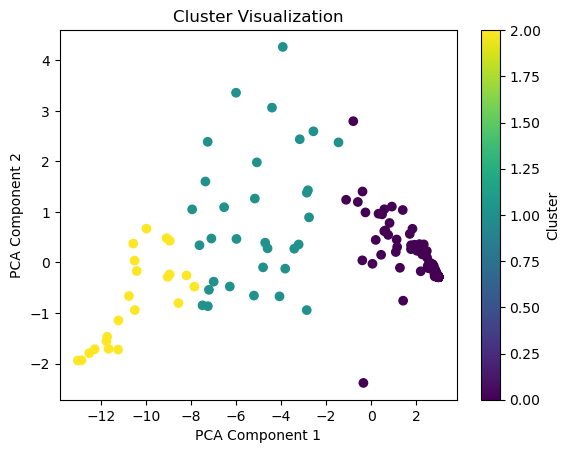

In [45]:

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [56]:
# Assuming 'df' is your DataFrame and the 'Cluster' column is already added
# Select the columns representing the years (2000-2021) with '_percentage' suffix
years_columns = [str(year) + "_percentage" for year in range(2000, 2022)]

# Group by 'Cluster' and calculate the mean for each year
avg_access_by_cluster = df.groupby('Cluster')[years_columns].mean()

# Print the average electricity access percentage for each cluster in every year
print(avg_access_by_cluster)

         2000_percentage  2001_percentage  2002_percentage  2003_percentage  \
Cluster                                                                       
0              93.577222        93.992871        94.289603        94.518341   
1              32.380685        33.604042        35.049765        36.945471   
2              10.142179        10.451016        11.318412        12.537727   

         2004_percentage  2005_percentage  2006_percentage  2007_percentage  \
Cluster                                                                       
0              94.839566        95.081944        95.676775        95.726195   
1              38.092514        40.145700        42.067115        42.995246   
2              13.436219        13.004464        14.414330        16.484661   

         2008_percentage  2009_percentage  ...  2012_percentage  \
Cluster                                    ...                    
0              96.109123        96.352818  ...        97.389272   
1      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


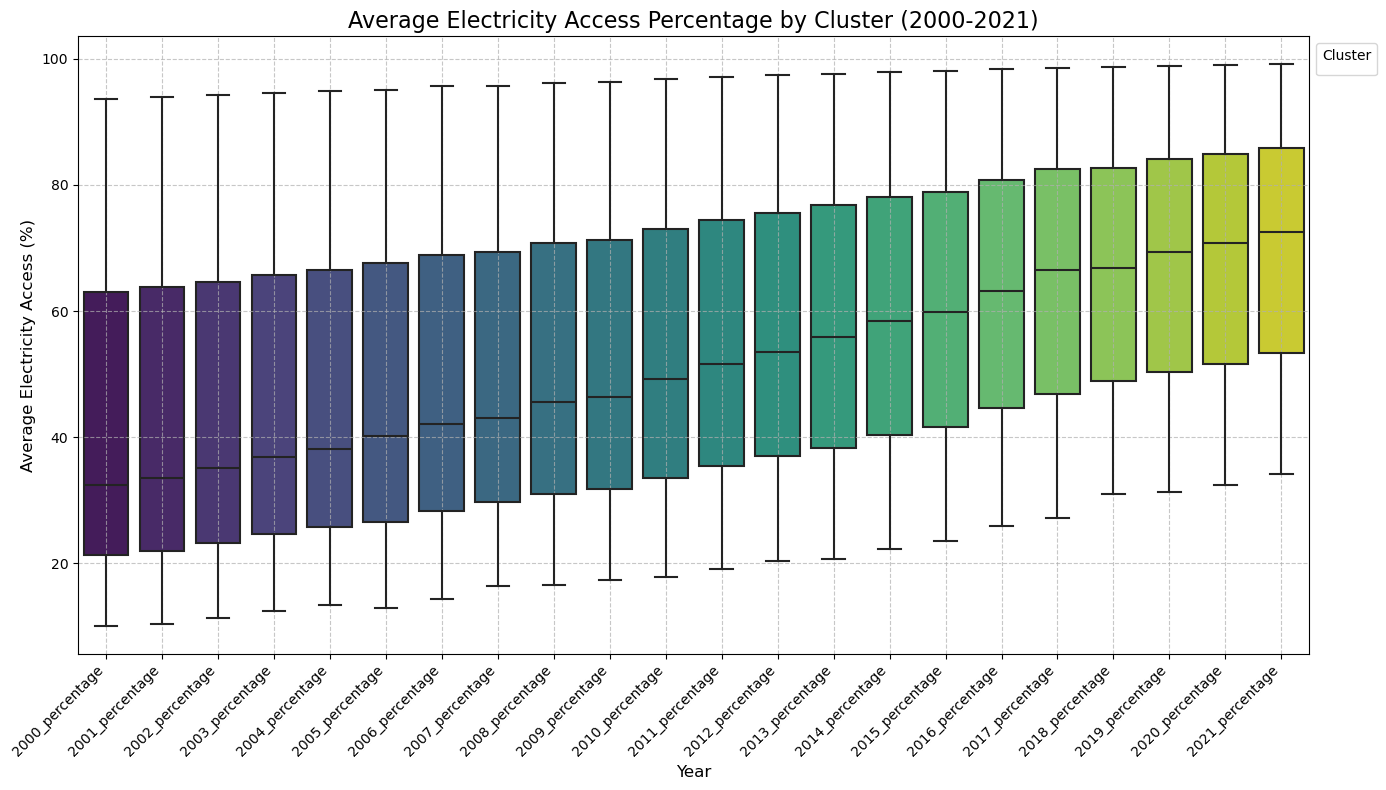

In [55]:

# Assuming 'avg_access_by_cluster' is already calculated and transposed

# Plotting the bar plot for all clusters
plt.figure(figsize=(14, 8))

# Using seaborn barplot
sns.boxplot(data=avg_access_by_cluster, palette="viridis")

# Set plot title and labels
plt.title('Average Electricity Access Percentage by Cluster (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Electricity Access (%)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend to differentiate the clusters
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

# Show grid for better clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


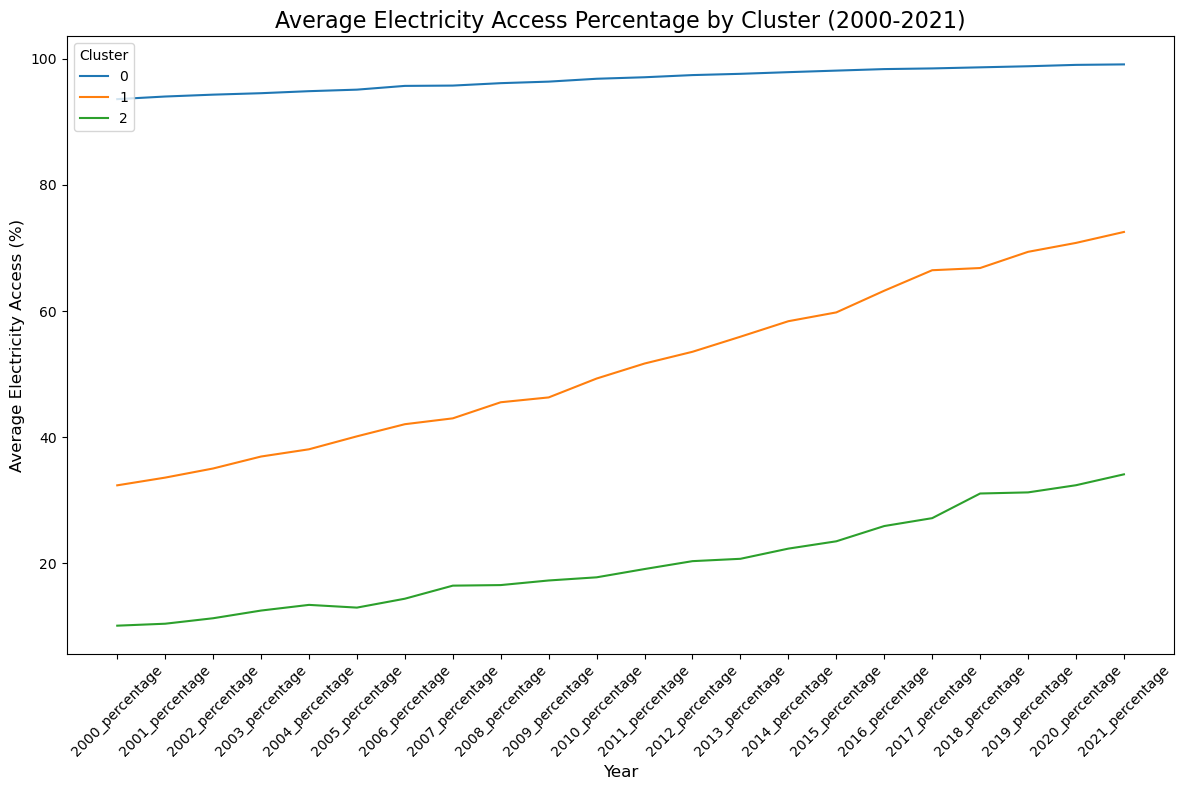

In [48]:

# Assuming 'avg_access_by_cluster' is already calculated
# Transpose the DataFrame so that each cluster becomes a column and years are rows
avg_access_by_cluster = avg_access_by_cluster.transpose()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_access_by_cluster, dashes=False)

# Set plot labels and title
plt.title('Average Electricity Access Percentage by Cluster (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Electricity Access (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.legend(title='Cluster', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [58]:

# Assuming 'df' is your DataFrame and 'years_columns' has the year columns (2000-2021)
years_columns = [str(year) + "_percentage" for year in range(2000, 2022)]
data = df[years_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Fit KMeans model (assuming you want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Predict clusters for each data point (row in the DataFrame)
df['Predicted_Cluster'] = kmeans.predict(scaled_data)

# Print the DataFrame with the predicted clusters
print(df[['Country/Regional and global averages', 'Predicted_Cluster']].head())


   Country/Regional and global averages  Predicted_Cluster
0                                     0                  1
1                                     1                  0
2                                     2                  0
4                                     3                  0
5                                     4                  2


C:\Users\jadit\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


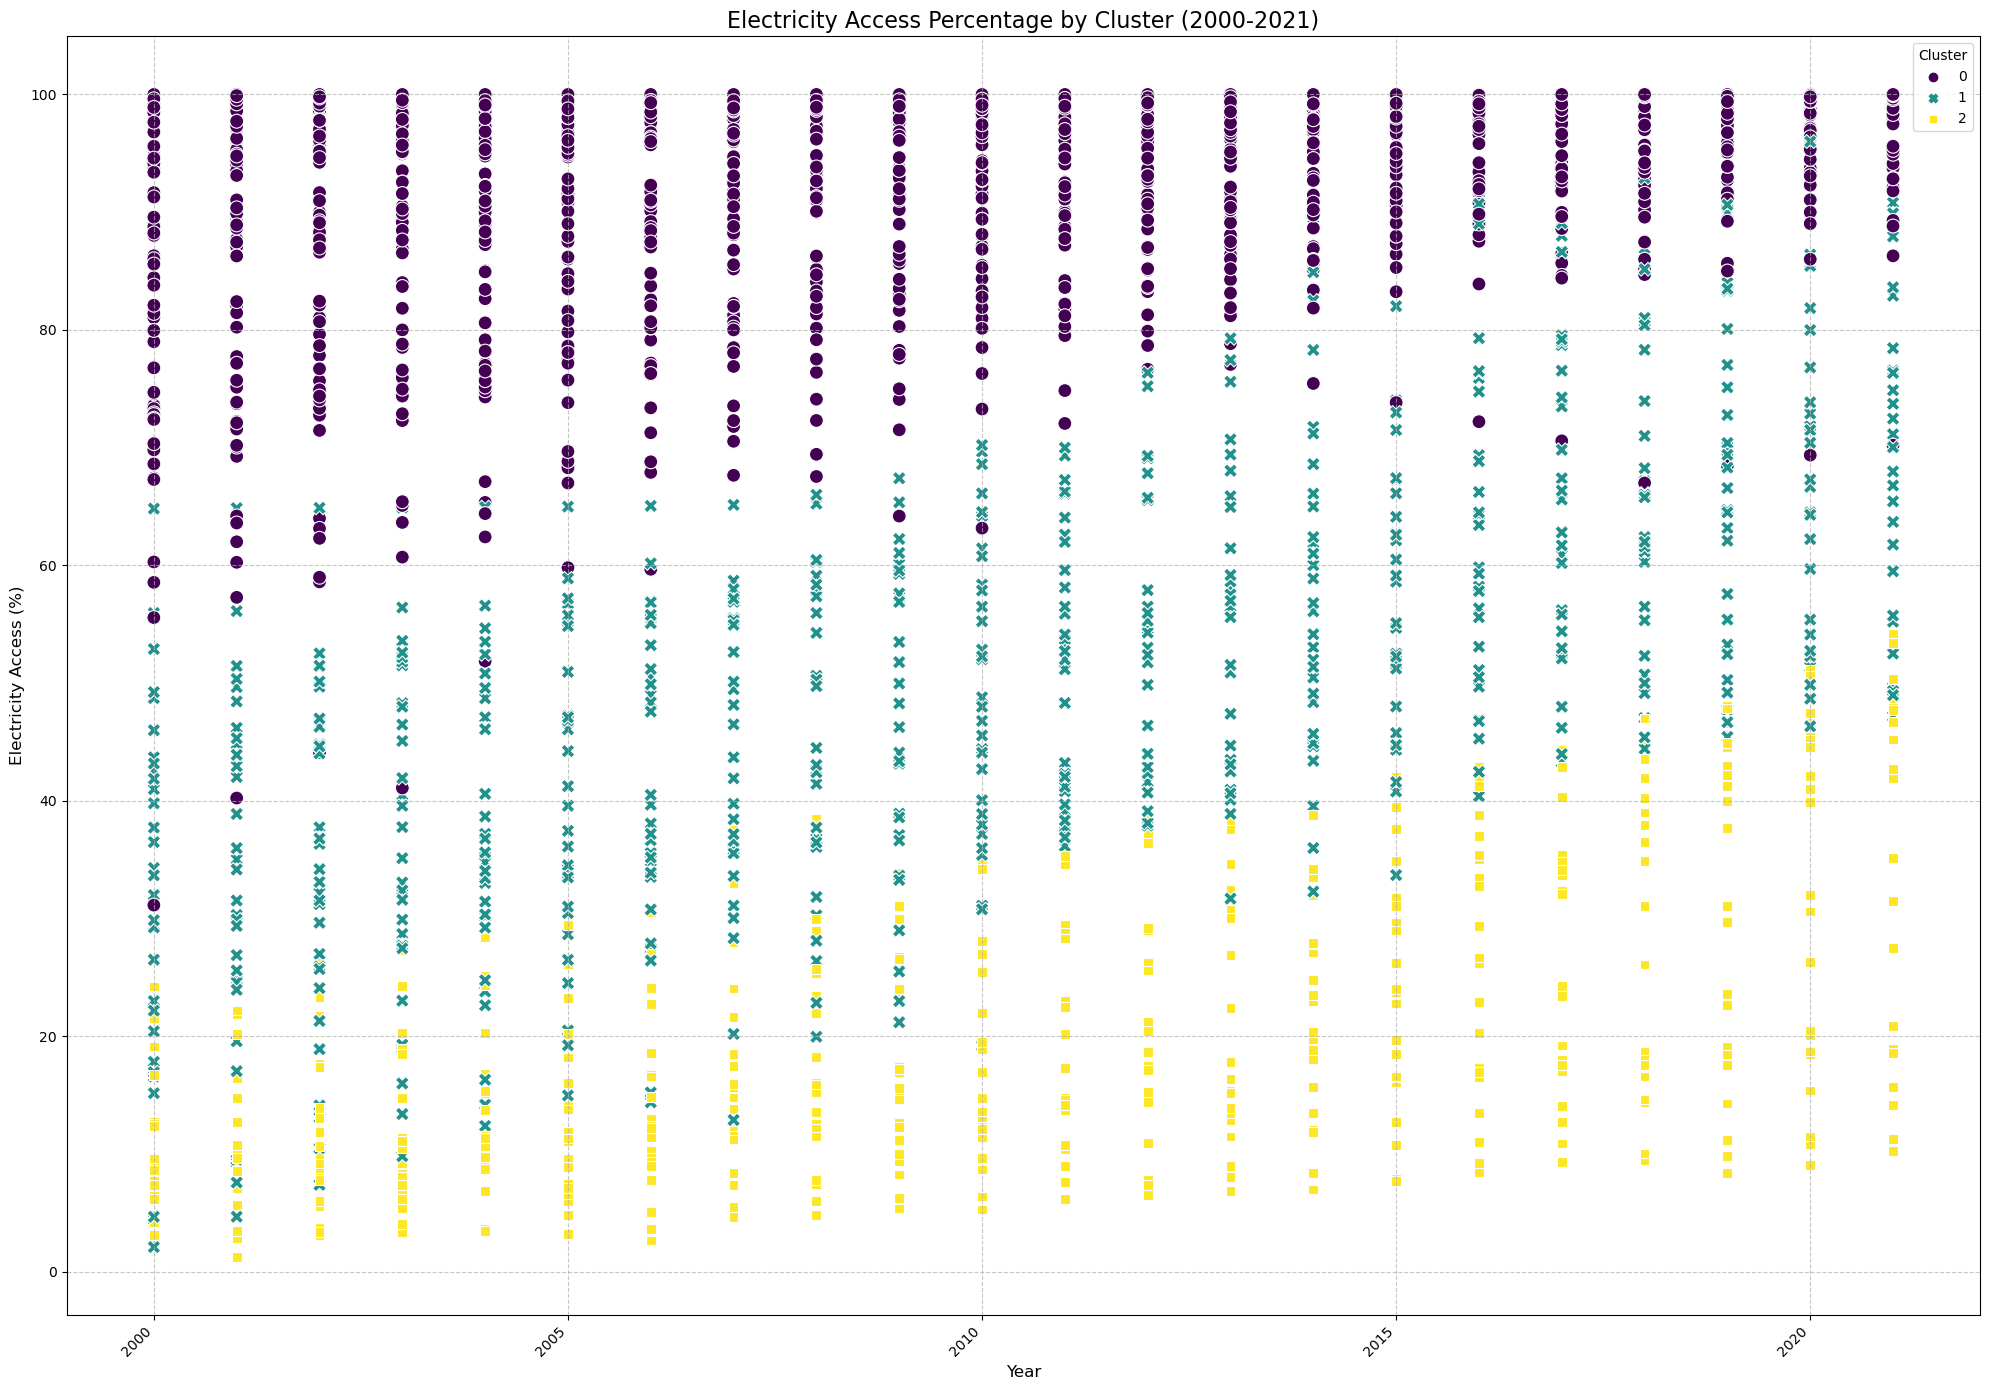

In [60]:

# Assuming 'df' now has a 'Predicted_Cluster' column with cluster predictions
# We will use the years and predicted clusters to plot

# Create a new DataFrame with 'Cluster', 'Years', and 'Access Percentage' for plotting
df_melted = df.melt(id_vars=['Country/Regional and global averages', 'Predicted_Cluster'],
                    value_vars=years_columns,
                    var_name='Year',
                    value_name='Electricity_Access_Percentage')


df_melted['Year'] = df_melted['Year'].apply(lambda x: int(x.split('_')[0]))

# Plotting
plt.figure(figsize=(20, 14))
sns.scatterplot(data=df_melted, x='Year', y='Electricity_Access_Percentage', 
                hue='Predicted_Cluster', style='Predicted_Cluster', palette="viridis", s=100)

# Set plot labels
plt.title('Electricity Access Percentage by Cluster (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Access (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [61]:
# Model Accuracy

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia (Sum of squared distances): {inertia}")

# Silhouette Score (higher is better, closer to 1)
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Inertia (Sum of squared distances): 435.3356559626561
Silhouette Score: 0.7568043752365718
